# Neural Network

In [94]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sys
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.datasets import fashion_mnist


In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [5]:
X_cv, X_test = X_test[7000:], X_test[:7000]
y_cv, y_test = y_test[7000:], y_test[:7000]

In [116]:
def my_nn(activation="relu", optimizer="Adamax", layers=(300, 100)):
  Xin = Input(shape=(28, 28))
  X = Flatten()(Xin)
  
  for layer in layers:
    X = Dense(layer, activation=activation)(X)
  x = Dropout(0.2)
  X = Dense(10, activation="softmax")(X)

  model = Model(inputs=Xin, outputs=X)

  model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
          metrics=["accuracy"])
  
  return model

In [117]:
logdir = os.path.join("logs", datetime.now().strftime("%Y%m%d-%H%M%S"))
logdir = os.path.join("logs", "run_5")

tensorflow_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
stopping_callback = tf.keras.callbacks.EarlyStopping(patience=2)

In [118]:
tf.keras.backend.clear_session()
model = my_nn(activation = 'relu',layers=(300, 100, 100, 100,50))
model.fit(x=X_train / 255.0, y=y_train,
          epochs=600,
          validation_data=(X_cv / 255.0, y_cv),
           callbacks=[tensorflow_callback, stopping_callback])

Train on 60000 samples, validate on 3000 samples
Epoch 1/600
60000/60000 [==============================] - 7s 118us/sample - loss: 0.5064 - acc: 0.8182 - val_loss: 0.4250 - val_acc: 0.8420
Epoch 2/600
60000/60000 [==============================] - 7s 109us/sample - loss: 0.3710 - acc: 0.8643 - val_loss: 0.3739 - val_acc: 0.8617
Epoch 3/600
60000/60000 [==============================] - 7s 113us/sample - loss: 0.3369 - acc: 0.8746 - val_loss: 0.3449 - val_acc: 0.8747
Epoch 4/600
60000/60000 [==============================] - 7s 115us/sample - loss: 0.3101 - acc: 0.8853 - val_loss: 0.3431 - val_acc: 0.8753
Epoch 5/600
60000/60000 [==============================] - 7s 115us/sample - loss: 0.2931 - acc: 0.8906 - val_loss: 0.3433 - val_acc: 0.8710
Epoch 6/600
60000/60000 [==============================] - 7s 115us/sample - loss: 0.2749 - acc: 0.8972 - val_loss: 0.3115 - val_acc: 0.8873
Epoch 7/600
60000/60000 [==============================] - 7s 117us/sample - loss: 0.2624 - acc: 0.9021 -

In [119]:

np.set_printoptions(threshold=sys.maxsize)
y_predict = model.predict(X_test)
y_predict_con = np.argmax(y_predict,  axis = 1)

In [120]:
df_data = pd.DataFrame(data, columns = np.unique(y_test), 
                     index = np.unique(y_test))
df_data.index.name = 'Actuales'
df_data.columns.name = 'Prediccciones'

df_data

Prediccciones,0,1,2,3,4,5,6,7,8,9
Actuales,,,,,,,,,,
0,514,7,4,20,9,1,112,0,19,2
1,0,666,0,13,1,0,0,0,1,0
2,6,7,383,10,191,0,123,0,7,0
3,11,22,2,603,41,0,21,0,5,4
4,0,0,15,19,631,0,45,0,2,0
5,0,0,0,0,1,578,0,26,5,94
6,55,4,17,17,93,0,480,0,26,0
7,0,0,0,0,0,3,0,523,0,167
8,0,1,0,3,6,1,7,1,688,2


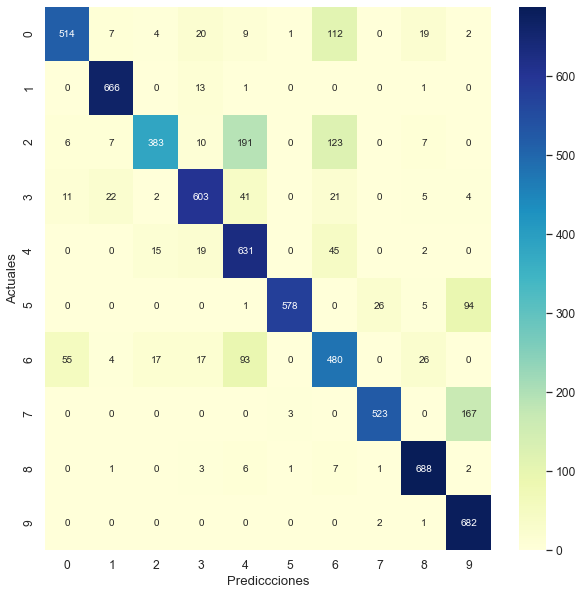

In [121]:
plt.figure(figsize = (10,10))
sns.heatmap(df_data,  
            cmap="YlGnBu",
            annot=True, 
            fmt='g')